# Metadata Service

Demonstrate the Synoptic Metadata service with SynopticPy.

In [1]:
from datetime import datetime

import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "Mona-Sans"  # or 'Hubot-Sans
plt.rcParams["font.monospace"] = "Fira Code"

import synoptic
from herbie.toolbox import EasyMap, pc, ccrs

/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Synoptic's station metadata service allows you to get just the metadata of stations you are interested in and filter based on station selection parameters.

Let's start by getting metadata from good 'ol trusty WBB...

In [2]:
s = synoptic.Metadata(stid="wbb")
s.df

🚚💨 Speedy delivery from Synoptic metadata service.
📦 Received data from 1 stations.


id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active
u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool
1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-09-14 03:45:00 UTC,false,true


We can also get all the stations in Utah that report air temperature, but only those that reported air temp since January 1, 2024. To make things interesting (and to showcase Poalrs), lets sort by the stations with the longest period of record.

> After looking at the result, I wouldn't take too much stock in Synoptics period-of-record database. It has errors like some stations with records back to 1970 (if you tried getting data that far back Synoptic will tell you the "Query start and/or end time outside valid time range" error) and some stations have end dates after start dates.

In [3]:
s = synoptic.Metadata(state="UT", vars="air_temp", obrange=datetime(2024, 1, 1))

df = s.df.with_columns(
    duration_of_record=pl.col("period_of_record_end") - pl.col("period_of_record_start")
).sort("duration_of_record", descending=True)
df

🚚💨 Speedy delivery from Synoptic metadata service.


📦 Received data from 1,343 stations.


id,stid,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,is_restricted,is_active,duration_of_record
u32,str,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,duration[μs]
58745,"""COOPFISU1""","""FISH SPRINGS NWR""",4357.0,39.8401,-113.3978,73,"""UT""","""America/Denver""",4357.0,null,null,false,false,null
63187,"""UCL21""","""PelicanLake - Agrimet PELU""",4820.0,40.17422,-109.66659,26,"""UT""","""America/Denver""",4822.8,1970-01-01 00:00:00 UTC,2024-09-14 02:45:00 UTC,false,true,19980d 2h 45m
63191,"""UCL25""","""Monroe - Agrimet MNRU""",5404.0,38.63411,-112.15766,26,"""UT""","""America/Denver""",5278.9,1970-01-01 00:00:00 UTC,2024-09-14 02:45:00 UTC,false,true,19980d 2h 45m
63192,"""UCL26""","""CastleValley - Agrimet CSVU""",4685.0,38.64793,-109.39925,26,"""UT""","""America/Denver""",4701.4,1970-01-01 00:00:00 UTC,2024-09-14 02:45:00 UTC,false,true,19980d 2h 45m
1,"""WBB""","""U of U William Browning Buildi…",4806.0,40.76623,-111.84755,153,"""UT""","""America/Denver""",4727.7,1997-01-01 00:00:00 UTC,2024-09-14 03:45:00 UTC,false,true,10118d 3h 45m
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
243425,"""G5189""","""GW5189 WEST JORDAN""",4540.0,40.62533,-111.9785,65,"""UT""","""America/Denver""",null,2024-08-20 16:50:00 UTC,2024-09-14 03:44:00 UTC,false,true,24d 10h 54m
243538,"""UTELP""","""SR-121 at MP 31.5 East Lapoint""",5692.0,40.4204,-109.67016,4,"""UT""","""America/Denver""",null,2024-08-23 00:40:00 UTC,2024-09-14 03:40:00 UTC,false,true,22d 3h
243553,"""G5214""","""GW5214 NORTH OGDEN""",4862.0,41.32567,-111.971,65,"""UT""","""America/Denver""",null,2024-08-27 20:30:00 UTC,2024-09-11 02:45:00 UTC,false,true,14d 6h 15m


## All Stations
It takes a few seconds, but you can get metadata for all Synoptic stations.

In [4]:
%%time
s = synoptic.Metadata()

🚚💨 Speedy delivery from Synoptic metadata service.
📦 Received data from 97,047 stations.
CPU times: user 1.93 s, sys: 1.71 s, total: 3.64 s
Wall time: 7.36 s


Let's plot the location of all those stations, and color them by timezone. Just for fun, let's also plot what available data existed in 1997. Of course, all this information is only as good as the metadata really is.

🚚💨 Speedy delivery from Synoptic metadata service.
📦 Received data from 61,117 stations.
🚚💨 Speedy delivery from Synoptic metadata service.
📦 Received data from 4,783 stations.


/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/seaborn/_core/data.py:313: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  return pd.api.interchange.from_dataframe(data)
/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/seaborn/_core/data.py:313: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  return pd.api.interchange.from_dataframe(data)
/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/seaborn/_core/data.py:313: SettingWithCopyWarning: modifications to a method of a datetimelike object are not supported and are discarded. Change values on the original.
  return pd.api.interchange.from_dataframe(data)
/home/blaylock/miniconda3/envs/synoptic2/lib/python3.12/site-packages/seaborn/_core/data.py:313: SettingWithCopyWarning: modification

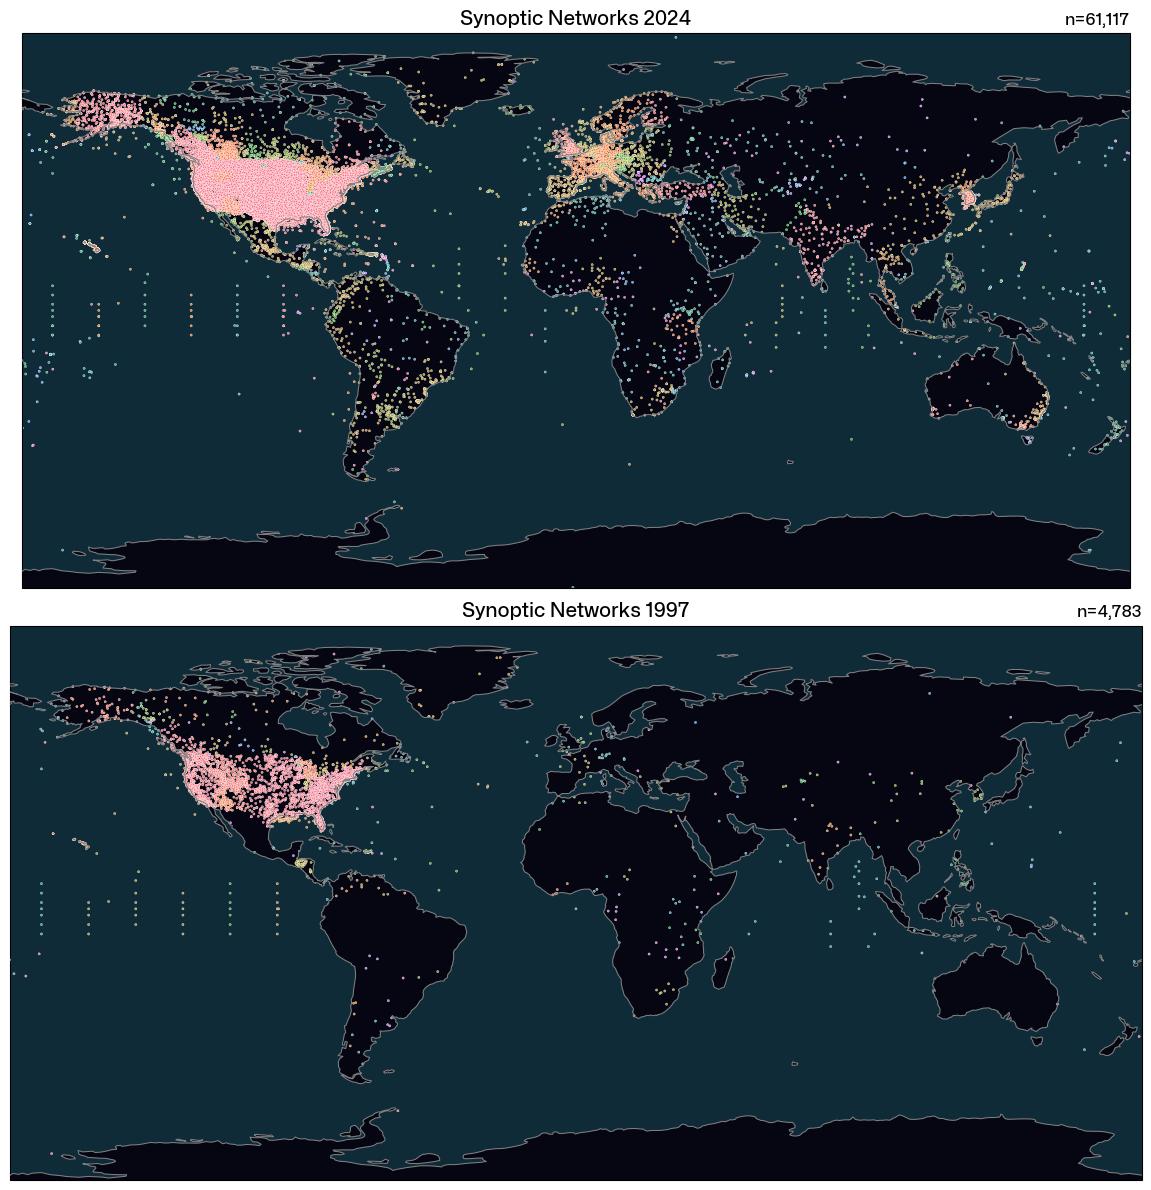

In [9]:
in_2024 = synoptic.Metadata(obrange=datetime(2024, 1, 1)).df
in_1997 = synoptic.Metadata(obrange=(datetime(1997, 1, 1), datetime(1998, 1, 1))).df

fig, (ax1, ax2) = plt.subplots(2, 1, subplot_kw=dict(projection=pc))

for ax in (ax1, ax2):
    EasyMap(ax=ax, theme="dark", figsize=(12, 12)).OCEAN()

sns.scatterplot(
    in_2024.unique(["latitude", "longitude"]),
    ax=ax1,
    x="longitude",
    y="latitude",
    hue="timezone",
    legend=False,
    marker=".",
    s=10,
)

sns.scatterplot(
    in_1997.unique(["latitude", "longitude"]),
    ax=ax2,
    x="longitude",
    y="latitude",
    hue="timezone",
    legend=False,
    marker=".",
    s=10,
)

ax1.set_title("Synoptic Networks 2024", fontsize="x-large")
ax1.set_title(f"n={len(in_2024):,}", loc="right")

ax2.set_title("Synoptic Networks 1997", fontsize="x-large")
ax2.set_title(f"n={len(in_1997):,}", loc="right")

plt.tight_layout()